In [1]:
import cv2 as cv
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

op = os.path.join

In [2]:
# read ccl_image1.txt and ccl_image2.txt and store them in a np.array
def read_ccl_txt(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    ccl = []
    for line in lines:
        ccl.append(list(map(int, line.strip().split())))
    return np.array(ccl)

In [3]:
ccl_image1 = read_ccl_txt("./ccl_image1.txt")
ccl_image2 = read_ccl_txt("./ccl_image2.txt")

In [4]:
print(ccl_image1.shape, ccl_image2.shape)

(800, 1200) (800, 1200)


In [5]:
def show_labeled_image(img):
    # different random colors for each label
    cmap = plt.cm.get_cmap('tab20', img.max())
    plt.imshow(img, cmap=cmap)
    plt.show()

/var/folders/w2/g11x7cpj7blf4j3f7ldsffqc0000gn/T/ipykernel_47025/2206722284.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', img.max())


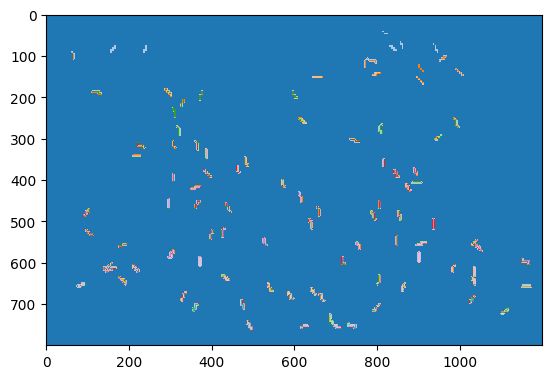

In [6]:
show_labeled_image(ccl_image1)

/var/folders/w2/g11x7cpj7blf4j3f7ldsffqc0000gn/T/ipykernel_47025/2206722284.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', img.max())


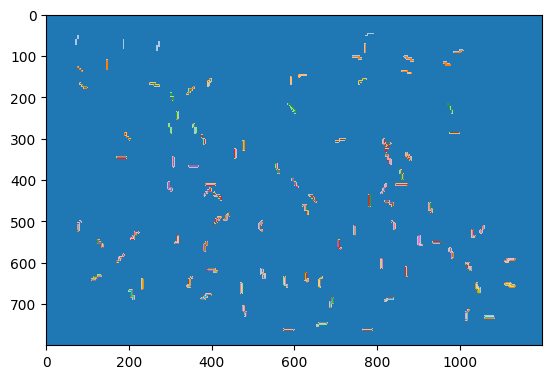

In [7]:
show_labeled_image(ccl_image2)

## **Block Matching (Motion Estimation)**

In [8]:
def motion_vector_estimation(cc_labeled1, cc_labeled2, block_size=5, search_range=5):
    def get_component_blocks(label_array):
        components = {}
        for label in np.unique(label_array):
            if label == 0:
                continue
            mask = label_array == label
            y_indices, x_indices = np.where(mask)
            y_min, y_max = y_indices.min(), y_indices.max()
            x_min, x_max = x_indices.min(), x_indices.max()
            components[label] = (y_min, y_max, x_min, x_max)
        return components
    
    def get_best_match(block, search_area):
        min_diff = float('inf')
        best_match = (0, 0)
        for dy in range(-search_range, search_range + 1):
            for dx in range(-search_range, search_range + 1):
                y, x = block[0] + dy, block[1] + dx
                if y >= 0 and x >= 0 and y + block_size <= search_area.shape[0] and x + block_size <= search_area.shape[1]:
                    diff = np.sum((block[2] - search_area[y:y + block_size, x:x + block_size])**2)
                    if diff < min_diff:
                        min_diff = diff
                        best_match = (dy, dx)
        return best_match
    
    components1 = get_component_blocks(cc_labeled1)
    components2 = get_component_blocks(cc_labeled2)
    
    motion_vectors = {}
    
    for label, (y_min, y_max, x_min, x_max) in components1.items():
        if label not in components2:
            continue
        
        block1 = cc_labeled1[y_min:y_max+1, x_min:x_max+1]
        search_area = cc_labeled2[y_min-search_range:y_max+1+search_range, x_min-search_range:x_max+1+search_range]
        
        dy, dx = get_best_match((y_min, x_min, block1), search_area)
        motion_vectors[label] = (dy, dx)
    
    return motion_vectors

In [9]:
motion_vectors = motion_vector_estimation(ccl_image1, ccl_image2, block_size=5, search_range=20)
print(motion_vectors)

{1: (0, 0), 2: (0, 0), 3: (0, 0), 4: (0, 0), 5: (0, 0), 6: (0, 0), 7: (0, 0), 8: (0, 0), 9: (0, 0), 10: (0, 0), 11: (0, 0), 12: (0, 0), 13: (0, 0), 14: (0, 0), 15: (0, 0), 16: (0, 0), 17: (0, 0), 18: (0, 0), 19: (0, 0), 20: (0, 0), 21: (0, 0), 22: (0, 0), 23: (0, 0), 24: (0, 0), 25: (0, 0), 26: (0, 0), 27: (0, 0), 28: (0, 0), 29: (0, 0), 30: (0, 0), 31: (0, 0), 32: (0, 0), 33: (0, 0), 34: (0, 0), 35: (0, 0), 36: (0, 0), 37: (0, 0), 38: (0, 0), 39: (0, 0), 40: (0, 0), 41: (0, 0), 42: (0, 0), 43: (0, 0), 44: (0, 0), 45: (0, 0), 46: (0, 0), 47: (0, 0), 48: (0, 0), 49: (0, 0), 50: (0, 0), 51: (0, 0), 52: (0, 0), 53: (0, 0), 54: (0, 0), 55: (0, 0), 56: (0, 0), 57: (0, 0), 58: (0, 0), 59: (0, 0), 60: (0, 0), 61: (0, 0), 62: (0, 0), 63: (0, 0), 64: (0, 0), 65: (0, 0), 66: (0, 0), 67: (0, 0), 68: (0, 0), 69: (0, 0), 70: (0, 0), 71: (0, 0), 72: (0, 0), 73: (0, 0), 74: (0, 0), 75: (0, 0), 76: (0, 0), 77: (0, 0), 78: (0, 0), 79: (0, 0), 80: (0, 0), 81: (0, 0), 82: (0, 0), 83: (0, 0), 84: (0, 0), 